In [73]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA,IncrementalPCA
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# For feature extraction we will use 
"""
1. PCA (For any kind of DS)
2. LDA (For classification examples)
"""

In [74]:
# PCA
df  = pd.read_csv('data_for_pca.csv')
df.head()
test = df
y = test.pop('price')
X = test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75)

In [75]:
pca = PCA(svd_solver='randomized',random_state=42) # Making PCA object

In [76]:
pca.fit(X_train)  # Fit Data

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [77]:
print(X_train.shape)
pca.components_.shape # It will create the features as mans as columns

(408, 13)


(13, 13)

In [78]:
pca_df = pd.DataFrame({'PC1':pca.components_[1],'PC2':pca.components_[1],'Feature':list(X_train.columns)})

In [79]:
pca_df # First 2 PCAcomponents

,PC1,PC2,Feature
0,-0.000089,-0.000089,area
1,0.483872,0.483872,bedrooms
2,0.261064,0.261064,bathrooms
3,0.810146,0.810146,stories
4,0.021349,0.021349,mainroad
5,0.029011,0.029011,guestroom
6,-0.027269,-0.027269,basement
7,0.018193,0.018193,hotwaterheating
8,0.160586,0.160586,airconditioning
9,0.093920,0.093920,parking


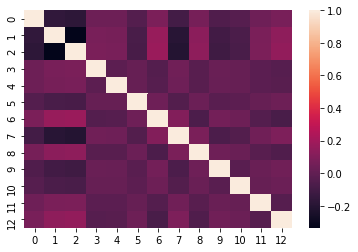

In [80]:
sns.heatmap(pd.DataFrame(pca.components_).corr()) # in PCA features arehaving least correlation

In [81]:
pd.DataFrame(pca.components_).corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.160478,-0.174249,0.038259,0.036410,-0.039713,0.085924,-0.099613,0.066817,-0.054902,-0.036414,0.039994,0.072979
1,-0.160478,1.000000,-0.335719,0.073711,0.070149,-0.076514,0.165547,-0.191922,0.128735,-0.105777,-0.070157,0.077055,0.140606
2,-0.174249,-0.335719,1.000000,0.080037,0.076169,-0.083080,0.179753,-0.208390,0.139781,-0.114854,-0.076177,0.083667,0.152671
3,0.038259,0.073711,0.080037,1.000000,-0.016724,0.018241,-0.039467,0.045755,-0.030691,0.025218,0.016726,-0.018370,-0.033521
4,0.036410,0.070149,0.076169,-0.016724,1.000000,0.017360,-0.037560,0.043544,-0.029208,0.023999,0.015917,-0.017482,-0.031901
5,-0.039713,-0.076514,-0.083080,0.018241,0.017360,1.000000,0.040968,-0.047495,0.031858,-0.026177,-0.017362,0.019069,0.034796
6,0.085924,0.165547,0.179753,-0.039467,-0.037560,0.040968,1.000000,0.102760,-0.068928,0.056636,0.037564,-0.041257,-0.075284
7,-0.099613,-0.191922,-0.208390,0.045755,0.043544,-0.047495,0.102760,1.000000,0.079909,-0.065659,-0.043549,0.047830,0.087278
8,0.066817,0.128735,0.139781,-0.030691,-0.029208,0.031858,-0.068928,0.079909,1.000000,0.044042,0.029211,-0.032083,-0.058543
9,-0.054902,-0.105777,-0.114854,0.025218,0.023999,-0.026177,0.056636,-0.065659,0.044042,1.000000,-0.024002,0.026361,0.048103


In [82]:
pca.explained_variance_ratio_

array([9.99999304e-01, 1.98582157e-07, 1.23412247e-07, 8.33037508e-08,
       7.12846169e-08, 5.28775643e-08, 3.84111759e-08, 3.36087498e-08,
       2.97339864e-08, 2.05581651e-08, 1.94555982e-08, 1.68780934e-08,
       7.92303796e-09])

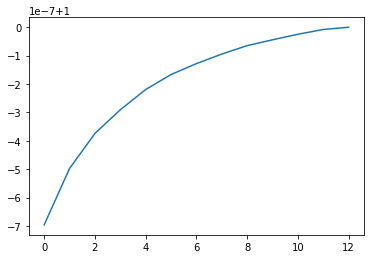

In [83]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [84]:
pca_final = IncrementalPCA(n_components=8)

In [85]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(408, 8)

In [86]:
pd.DataFrame(df_train_pca).shape

(408, 8)

In [87]:
# LDA
df = pd.read_csv('wine.csv')

In [88]:
df.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [89]:
y = df.pop('Wine')
X = df

In [90]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

In [91]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [92]:
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)

In [93]:
pd.DataFrame(X_train).head()

,0,1
0,-1.645794,-3.652411
1,5.326299,2.105375
2,4.482727,1.979130
3,-1.877364,-2.345257
4,-2.432924,0.429939
